"""

Welcome to the team's 9 modelization model. You will see in this python code four cells running for maximization of profit if we, as the Cornology company, decide to open a plant in Nong Khai, Chiang Rai, Bangkok, and Yala. Those models will be critical to verify the alignment with the geopolitical analysis. 

"""

In [2]:
####### Optimization model for Chiang Rai ######
# The first step to the realization of this model is to import the packages needed
#importing pandas
import pandas as pd
#importing numpy
import numpy as np
#importing math
import math
#importing pulp (for the linear programming)
import pulp 

#As part of any optimization problem we need to define three critical elements: variables, objective function and the constraints
#We therefore define our variables
#Construction of the factory in Nong Khai
NK = pulp.LpVariable(name="NK", lowBound = 0, upBound = 1, cat = "Binary")
#Construction of the factory in Chiang Rai
CR = pulp.LpVariable(name="CR", lowBound = 0, upBound = 1, cat = "Binary")
#Construction of the factory in Bangkok
BK = pulp.LpVariable(name="BK", lowBound = 0, upBound = 1, cat = "Binary")
#Construction of the factory in Yala
YALA = pulp.LpVariable(name="YALA", lowBound = 0, upBound = 1, cat = "Binary")
#Distribution in North East
NE = pulp.LpVariable(name="NE", lowBound = 0, upBound = 1, cat = "Binary")
#Distribution in North Central
NC = pulp.LpVariable(name="NC", lowBound = 0, upBound = 1, cat = "Binary")
#Distribution in Yangtze River Delta
YRD = pulp.LpVariable(name="YRD", lowBound = 0, upBound = 1, cat = "Binary")
#Distribution in South East
SE = pulp.LpVariable(name="SE", lowBound = 0, upBound = 1, cat = "Binary")
#Distribution in South Central
SC = pulp.LpVariable(name="SC", lowBound = 0, upBound = 1, cat = "Binary")
#Distribution in Western China
WC = pulp.LpVariable(name="WC", lowBound = 0, upBound = 1, cat = "Binary")

#We list the distribution sites
port = [NE, NC, YRD, SE, SC, WC]

#We define the demand for both original and flavored into a matrix where the original is the first row and the second row is the flavored pop corn
#Additionally, the columns represents the following regions in order: NE, NC, YRD, SE, SC and WC
demand = np.array([[0, 90, 180, 127, 118, 90],
                  [70, 70, 112, 37, 74, 0]])

#Both the ojective function and constraints depend on the run possible by the factories
#We therefore needed to comply with the maximum 5 runs as well as the 90% of demand fulfilled

#maximum number of runs available
max_number_run = 5
#minimum demand to fulfill before moving to another region
min_demand = 0.9

#We come up with a table of the production information since the entire model depends on it
#the first row consist in the original popcorn, the second row the flavor, the third row consist in the availability of raw materials
#the final two rows consist in the maximum production for original and flavor respectively
production = np.array([[12500,15000,125000],
                      [7500,12500,22500],
                      [0,1350000,1575000],
                      [0,90,126],
                      [0,108,70]])

#in order to determine the runs we create a matrix to evaluate the number of run for each demand
#We create a list for the original flavor where we would add the elements thanks to a for loop
initial_original = []

#We continue with a for loop to determine mathematically the number of run for the original 
for run_original in range(6):
    #formula for the number of runs
    num_run_orginal = math.ceil(demand[0, run_original] / production[3, 1])
    #adding the element to original list
    initial_original.append(num_run_orginal)


#We create a list for the flavored popcorn where we would add the elements thanks to a for loop
initial_flavor = []

#We continue with a for loop to determine mathematically the number of run for the flavored popcorn
for run_flavored in range(6):
    #formula for the number of runs
    num_run_flavor = math.ceil(demand[1, run_flavored] / production[4, 2])
    #adding the element to flavor list
    initial_flavor.append(num_run_flavor)

#We create a matrix with the information of original in the first row and flavor in the second one
initial = np.array([initial_original, initial_flavor])


#We then create a final matrix taking into account the constraints
#We create the list runs with constraints of 90% for the original
run_w_constraints_original  = []

#start of the for loop to define the number of runs of original
for run in range(6):
    #if statement to define the run due to the demand and the possible run
    if demand[0,run] * min_demand <=  production[3,1] * round(demand[0,run] / production[3,1]):
        #first type of calculation
        r_demand_original1 = round(demand[0,run] / production[3,1])
        #We add the result to the aforementioned list for original
        run_w_constraints_original.append(r_demand_original1)
    #else statement
    else:
        #second type of calculation
        r_demand_original2 = math.ceil(demand[0,run] / production[3,1])
        #We add the result to the aforementioned list for original
        run_w_constraints_original.append(r_demand_original2)

#We create the list runs with constraints of 90% for the flavored popcorn
run_w_constraints_flavor  = []

#start of the for loop to define the number of runs of flavored popcorn
for run in range(6):
    #if statement to define the run due to the demand and the possible run
    if demand[1,run] * min_demand <=  production[4,2] * round(demand[1,run] / production[4,2]):
        #first type of calculation
        r_demand_original1 = round(demand[1,run] / production[4,2])
        #We add the result to the aforementioned list for flavored popcorn
        run_w_constraints_flavor.append(r_demand_original1)
    #else statement
    else:
        #second type of calculation
        r_demand_original2 = math.ceil(demand[1,run] / production[4,2])
        #We add the result to the aforementioned list for flavored popcorn
        run_w_constraints_flavor.append(r_demand_original2)


#Run with the constraints matrix        
run_w_constraints = np.array([run_w_constraints_original, run_w_constraints_flavor])

#We calculate the final row of constraints 
total = sum(run_w_constraints)

#Finally we want to know the amount of profit for both the original and the flavor for all the different port
#We create a list empty of the original's profits that where we will add the values
profit_original = []

#We start our for loop statement to evaluate the profit made
for run  in range(6):
    #if statement to see if the number of run are equivalent with and without constraints
    if initial[0,run] == run_w_constraints[0,run]:
        #first type of calculation
        profit_original1 = (demand[0, run] % production[3,1] + demand[0,run] // production[3,1] * production[3,1]) * production[0,0] * port[run] # list name "port"
        #adding the element to the list
        profit_original.append(profit_original1)
    #else statement
    else:
        #second type of calculation
        profit_original2 = demand[0,run] // production[3,1] * production[3,1] *production[0,0] * port[run] # list name "port"
        #adding the element to the list
        profit_original.append(profit_original2)

#We create a list empty of the flavored popcorn's profits that where we will add the values
profit_flavor = []

#We start our for loop statement to evaluate the profit made
for run  in range(6):
    #if statement to see if the number of run are equivalent with and without constraints
    if initial[1,run] == run_w_constraints[1,run]:
        #first type of calculation
        profit_flavor1 = (demand[1, run] % production[4,2] + demand[1,run] // production[4,2] * production[4,2]) * production[1,0] * port[run] # list name "port" 
        #adding the element to the list
        profit_flavor.append(profit_flavor1)
    #else statement
    else:
        #second type of calculation
        profit_flavor2 = demand[1,run] // production[4,2] * production[4,2] *production[1,0] * port[run] # list name "port"
        #adding the element to the list
        profit_flavor.append(profit_flavor2)

#We add them into a matrix
total_profit = np.array([profit_original, profit_flavor])

#Now that the run variables are defined it is possible define our objective fucntion as well as the constraints
#We are looking to maximize the profit of Cornology
model = pulp.LpProblem(name='Cornology Problem', sense= pulp.LpMaximize)

# Objective function state the following
model += sum(profit_original) + sum(profit_flavor)

# We define the following constraints to our model

#The first constraint is that we can only open one factory
model += NK + CR + BK + YALA <= 1  

#Nong Khai only enables entering to North East
model += NK - NE == 0     
#Chiang Rai only enables entering to North Central
model += CR - NC == 0     
#Bangkok only enables entering to Yangtze River Delta
model += BK - YRD == 0    
#Yala only enables entering to Western China
model += YALA - WC == 0   

#This one correspond to the total running constraint
model += total[0]*NE + total[1]*NC + total[2]*YRD + total[3]*SE + total[4]*SC + total[5]*WC <= 5   

#If we enter by North East, we have a range of possibility to enter 
model += total[0]*NE + total[1]*NC + total[2]*YRD <= 5 # NE MARKET FIRST ENTRY

#If we enter by North Central, we have a range of possibility to enter
model += total[0]*NE + total[1]*NC + total[2]*YRD + total[3]*SE + total[4]*SC + total[5]*WC <= 5 

#If we enter by Yangtze River Delta, we have a range of possibility to enter
model += total[1]*NC + total[2]*YRD + total[3]*SE + total[4]*SC <= 5 

#If we enter by Western China, we have a range of possibility to enter
model += total[1]*NC + total[4]*SC + total[5]*WC <= 5

#We can ask the serve for the solution
status = model.solve()
crm = model.objective.value()
#Display the results of the model
#Result of the objective function
print("Result", model.objective.value())
#Value for Nong Khai if 0 it means not entering if 1 we should enter it
print("NK:", NK.value())
#Value for Chiang Rai if 0 it means not entering if 1 we should enter it
print("CR:", CR.value())
#Value for Yala if 0 it means not entering if 1 we should enter it
print("BK:", BK.value())
#Value for Nong Khai if 0 it means not entering if 1 we should enter it
print("YALA:", YALA.value())
#Value for North East if 0 it means not entering if 1 we should enter it
print("NE:", NE.value())
#Value for North Central if 0 it means not entering if 1 we should enter it
print("NC:", NC.value())
#Value for Yangtze River Delta if 0 it means not entering if 1 we should enter it
print("YRD:", YRD.value())
#Value for South East if 0 it means not entering if 1 we should enter it
print("SE:", SE.value())
#Value for South Central if 0 it means not entering if 1 we should enter it
print("SC:", SC.value())
#Value for Western China if 0 it means not entering if 1 we should enter it
print("WC:", WC.value())

#We come up with one sentence for the well comprehension of the result
print(f""" The objective function of maximize profit found a solution and is letting us know that its value is: {model.objective.value()}
        Additionally, if we enter by Chiang Rai, the model shows we can access North Central and South Central.""")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ericavargas/opt/anaconda3/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/1r/wycwcw6n6ql7c9yfpc3lysmr0000gn/T/0c810d62063f449da06a1a92801515e3-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/1r/wycwcw6n6ql7c9yfpc3lysmr0000gn/T/0c810d62063f449da06a1a92801515e3-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 15 COLUMNS
At line 76 RHS
At line 87 BOUNDS
At line 98 ENDATA
Problem MODEL has 10 rows, 10 columns and 34 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 3.78e+06 - 0.00 seconds
Cgl0003I 0 fixed, 0 tightened bounds, 3 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 1 strengthened rows, 0 substitutions
Cgl0004I processed model has 5 rows, 6 columns (6 integer (6 of which binary)) and 23 elements


/Users/ericavargas/opt/anaconda3/lib/python3.9/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [3]:
####### Optimization model for Nong Khai ######
# The first step to the realization of this model is to import the packages needed
#importing pandas
import pandas as pd
#importing numpy
import numpy as np
#importing math
import math
#importing pulp (for the linear programming)
import pulp 

#As part of any optimization problem we need to define three critical elements: variables, objective function and the constraints
#We therefore define our variables
#Construction of the factory in Nong Khai
NK = 1
#Construction of the factory in Chiang Rai
CR = 0
#Construction of the factory in Bangkok
BK = 0
#Construction of the factory in Yala
YALA = 0
#Distribution in North East
NE = pulp.LpVariable(name="NE", lowBound = 0, upBound = 1, cat = "Binary")
#Distribution in North Central
NC = pulp.LpVariable(name="NC", lowBound = 0, upBound = 1, cat = "Binary")
#Distribution in Yangtze River Delta
YRD = pulp.LpVariable(name="YRD", lowBound = 0, upBound = 1, cat = "Binary")
#Distribution in South East
SE = pulp.LpVariable(name="SE", lowBound = 0, upBound = 1, cat = "Binary")
#Distribution in South Central
SC = pulp.LpVariable(name="SC", lowBound = 0, upBound = 1, cat = "Binary")
#Distribution in Western China
WC = pulp.LpVariable(name="WC", lowBound = 0, upBound = 1, cat = "Binary")

#We list the distribution sites
port = [NE, NC, YRD, SE, SC, WC]

#We define the demand for both original and flavored into a matrix where the original is the first row and the second row is the flavored pop corn
#Additionally, the columns represents the following regions in order: NE, NC, YRD, SE, SC and WC
demand = np.array([[0, 90, 180, 127, 118, 90],
                  [70, 70, 112, 37, 74, 0]])

#Both the ojective function and constraints depend on the run possible by the factories
#We therefore needed to comply with the maximum 5 runs as well as the 90% of demand fulfilled

#maximum number of runs available
max_number_run = 5
#minimum demand to fulfill before moving to another region
min_demand = 0.9

#We come up with a table of the production information since the entire model depends on it
#the first row consist in the original popcorn, the second row the flavor, the third row consist in the availability of raw materials
#the final two rows consist in the maximum production for original and flavor respectively
production = np.array([[12500,15000,125000],
                      [7500,12500,22500],
                      [0,1350000,1575000],
                      [0,90,126],
                      [0,108,70]])

#in order to determine the runs we create a matrix to evaluate the number of run for each demand
#We create a list for the original flavor where we would add the elements thanks to a for loop
initial_original = []

#We continue with a for loop to determine mathematically the number of run for the original 
for run_original in range(6):
    #formula for the number of runs
    num_run_orginal = math.ceil(demand[0, run_original] / production[3, 1])
    #adding the element to original list
    initial_original.append(num_run_orginal)


#We create a list for the flavored popcorn where we would add the elements thanks to a for loop
initial_flavor = []

#We continue with a for loop to determine mathematically the number of run for the flavored popcorn
for run_flavored in range(6):
    #formula for the number of runs
    num_run_flavor = math.ceil(demand[1, run_flavored] / production[4, 2])
    #adding the element to flavor list
    initial_flavor.append(num_run_flavor)

#We create a matrix with the information of original in the first row and flavor in the second one
initial = np.array([initial_original, initial_flavor])


#We then create a final matrix taking into account the constraints
#We create the list runs with constraints of 90% for the original
run_w_constraints_original  = []

#start of the for loop to define the number of runs of original
for run in range(6):
    #if statement to define the run due to the demand and the possible run
    if demand[0,run] * min_demand <=  production[3,1] * round(demand[0,run] / production[3,1]):
        #first type of calculation
        r_demand_original1 = round(demand[0,run] / production[3,1])
        #We add the result to the aforementioned list for original
        run_w_constraints_original.append(r_demand_original1)
    #else statement
    else:
        #second type of calculation
        r_demand_original2 = math.ceil(demand[0,run] / production[3,1])
        #We add the result to the aforementioned list for original
        run_w_constraints_original.append(r_demand_original2)

#We create the list runs with constraints of 90% for the flavored popcorn
run_w_constraints_flavor  = []

#start of the for loop to define the number of runs of flavored popcorn
for run in range(6):
    #if statement to define the run due to the demand and the possible run
    if demand[1,run] * min_demand <=  production[4,2] * round(demand[1,run] / production[4,2]):
        #first type of calculation
        r_demand_original1 = round(demand[1,run] / production[4,2])
        #We add the result to the aforementioned list for flavored popcorn
        run_w_constraints_flavor.append(r_demand_original1)
    #else statement
    else:
        #second type of calculation
        r_demand_original2 = math.ceil(demand[1,run] / production[4,2])
        #We add the result to the aforementioned list for flavored popcorn
        run_w_constraints_flavor.append(r_demand_original2)


#Run with the constraints matrix        
run_w_constraints = np.array([run_w_constraints_original, run_w_constraints_flavor])

#We calculate the final row of constraints 
total = sum(run_w_constraints)

#Finally we want to know the amount of profit for both the original and the flavor for all the different port
#We create a list empty of the original's profits that where we will add the values
profit_original = []

#We start our for loop statement to evaluate the profit made
for run  in range(6):
    #if statement to see if the number of run are equivalent with and without constraints
    if initial[0,run] == run_w_constraints[0,run]:
        #first type of calculation
        profit_original1 = (demand[0, run] % production[3,1] + demand[0,run] // production[3,1] * production[3,1]) * production[0,0] * port[run] # list name "port"
        #adding the element to the list
        profit_original.append(profit_original1)
    #else statement
    else:
        #second type of calculation
        profit_original2 = demand[0,run] // production[3,1] * production[3,1] *production[0,0] * port[run] # list name "port"
        #adding the element to the list
        profit_original.append(profit_original2)

#We create a list empty of the flavored popcorn's profits that where we will add the values
profit_flavor = []

#We start our for loop statement to evaluate the profit made
for run  in range(6):
    #if statement to see if the number of run are equivalent with and without constraints
    if initial[1,run] == run_w_constraints[1,run]:
        #first type of calculation
        profit_flavor1 = (demand[1, run] % production[4,2] + demand[1,run] // production[4,2] * production[4,2]) * production[1,0] * port[run] # list name "port" 
        #adding the element to the list
        profit_flavor.append(profit_flavor1)
    #else statement
    else:
        #second type of calculation
        profit_flavor2 = demand[1,run] // production[4,2] * production[4,2] *production[1,0] * port[run] # list name "port"
        #adding the element to the list
        profit_flavor.append(profit_flavor2)

#We add them into a matrix
total_profit = np.array([profit_original, profit_flavor])

#Now that the run variables are defined it is possible define our objective fucntion as well as the constraints
#We are looking to maximize the profit of Cornology
model = pulp.LpProblem(name='Cornology Problem', sense= pulp.LpMaximize)

# Objective function state the following
model += sum(profit_original) + sum(profit_flavor)

# We define the following constraints to our model

#The first constraint is that we can only open one factory
model += NK + CR + BK + YALA <= 1  

#Nong Khai only enables entering to North East
model += NK - NE == 0       

#This one correspond to the total running constraint
model += total[0]*NE + total[1]*NC + total[2]*YRD + total[3]*SE + total[4]*SC + total[5]*WC <= 5   

#If we enter by North East, we have a range of possibility to enter 
model += total[0]*NE + total[1]*NC + total[2]*YRD <= 5 # NE MARKET FIRST ENTRY

#If we enter by North Central, we have a range of possibility to enter
model += total[0]*NE + total[1]*NC + total[2]*YRD + total[3]*SE + total[4]*SC + total[5]*WC <= 5 

#If we enter by Yangtze River Delta, we have a range of possibility to enter
model += total[1]*NC + total[2]*YRD + total[3]*SE + total[4]*SC <= 5 

#If we enter by Western China, we have a range of possibility to enter
model += total[1]*NC + total[4]*SC + total[5]*WC <= 5

#Western China entry only if North Central is entered
model += NC - WC >= 0
#South East entry only if North Central is entered
model += NC - SE >= 0 
#South Central entry only if North Central is entered
model += NC - SC >= 0 
#South Central entry only if Yangtze River Delta is entered
model += YRD - SC >= 0 

#We can ask the serve for the solution
status = model.solve()
nkm = model.objective.value()
#Display the results of the model
#Result of the objective function
print("Result", model.objective.value())
#Value for North East if 0 it means not entering if 1 we should enter it
print("NE:", NE.value())
#Value for North Central if 0 it means not entering if 1 we should enter it
print("NC:", NC.value())
#Value for Yangtze River Delta if 0 it means not entering if 1 we should enter it
print("YRD:", YRD.value())
#Value for South East if 0 it means not entering if 1 we should enter it
print("SE:", SE.value())
#Value for South Central if 0 it means not entering if 1 we should enter it
print("SC:", SC.value())
#Value for Western China if 0 it means not entering if 1 we should enter it
print("WC:", WC.value())

#We come up with one sentence for the well comprehension of the result
print(f""" The objective function of maximize profit found a solution and is letting us know that its value is: {model.objective.value()}
        Additionally, if we enter by Nong Khai, the model shows we can access North East and Yangtze River Delta.""")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ericavargas/opt/anaconda3/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/1r/wycwcw6n6ql7c9yfpc3lysmr0000gn/T/eba9a464a0f142d1a344f17bab413580-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/1r/wycwcw6n6ql7c9yfpc3lysmr0000gn/T/eba9a464a0f142d1a344f17bab413580-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 15 COLUMNS
At line 65 RHS
At line 76 BOUNDS
At line 83 ENDATA
Problem MODEL has 10 rows, 6 columns and 31 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 4.0725e+06 - 0.00 seconds
Cgl0002I 1 variables fixed
Cgl0003I 2 fixed, 0 tightened bounds, 4 strengthened rows, 0 substitutions
Cgl0004I processed model has 4 rows, 3 columns (3 integer (3 of which binary)) and 9 elements
Cbc0038I Initial state - 0 integers unsatisfied 

In [4]:
####### Optimization model for Yala ######
# The first step to the realization of this model is to import the packages needed
#importing pandas
import pandas as pd
#importing numpy
import numpy as np
#importing math
import math
#importing pulp (for the linear programming)
import pulp 

#As part of any optimization problem we need to define three critical elements: variables, objective function and the constraints
#We therefore define our variables
#Construction of the factory in Nong Khai
NK = 0
#Construction of the factory in Chiang Rai
CR = 0
#Construction of the factory in Bangkok
BK = 0
#Construction of the factory in Yala
YALA = 1
#Distribution in North East
NE = pulp.LpVariable(name="NE", lowBound = 0, upBound = 1, cat = "Binary")
#Distribution in North Central
NC = pulp.LpVariable(name="NC", lowBound = 0, upBound = 1, cat = "Binary")
#Distribution in Yangtze River Delta
YRD = pulp.LpVariable(name="YRD", lowBound = 0, upBound = 1, cat = "Binary")
#Distribution in South East
SE = pulp.LpVariable(name="SE", lowBound = 0, upBound = 1, cat = "Binary")
#Distribution in South Central
SC = pulp.LpVariable(name="SC", lowBound = 0, upBound = 1, cat = "Binary")
#Distribution in Western China
WC = pulp.LpVariable(name="WC", lowBound = 0, upBound = 1, cat = "Binary")

#We list the distribution sites
port = [NE, NC, YRD, SE, SC, WC]

#We define the demand for both original and flavored into a matrix where the original is the first row and the second row is the flavored pop corn
#Additionally, the columns represents the following regions in order: NE, NC, YRD, SE, SC and WC
demand = np.array([[0, 90, 180, 127, 118, 90],
                  [70, 70, 112, 37, 74, 0]])

#Both the ojective function and constraints depend on the run possible by the factories
#We therefore needed to comply with the maximum 5 runs as well as the 90% of demand fulfilled

#maximum number of runs available
max_number_run = 5
#minimum demand to fulfill before moving to another region
min_demand = 0.9

#We come up with a table of the production information since the entire model depends on it
#the first row consist in the original popcorn, the second row the flavor, the third row consist in the availability of raw materials
#the final two rows consist in the maximum production for original and flavor respectively
production = np.array([[12500,15000,125000],
                      [7500,12500,22500],
                      [0,1350000,1575000],
                      [0,90,126],
                      [0,108,70]])

#in order to determine the runs we create a matrix to evaluate the number of run for each demand
#We create a list for the original flavor where we would add the elements thanks to a for loop
initial_original = []

#We continue with a for loop to determine mathematically the number of run for the original 
for run_original in range(6):
    #formula for the number of runs
    num_run_orginal = math.ceil(demand[0, run_original] / production[3, 1])
    #adding the element to original list
    initial_original.append(num_run_orginal)


#We create a list for the flavored popcorn where we would add the elements thanks to a for loop
initial_flavor = []

#We continue with a for loop to determine mathematically the number of run for the flavored popcorn
for run_flavored in range(6):
    #formula for the number of runs
    num_run_flavor = math.ceil(demand[1, run_flavored] / production[4, 2])
    #adding the element to flavor list
    initial_flavor.append(num_run_flavor)

#We create a matrix with the information of original in the first row and flavor in the second one
initial = np.array([initial_original, initial_flavor])


#We then create a final matrix taking into account the constraints
#We create the list runs with constraints of 90% for the original
run_w_constraints_original  = []

#start of the for loop to define the number of runs of original
for run in range(6):
    #if statement to define the run due to the demand and the possible run
    if demand[0,run] * min_demand <=  production[3,1] * round(demand[0,run] / production[3,1]):
        #first type of calculation
        r_demand_original1 = round(demand[0,run] / production[3,1])
        #We add the result to the aforementioned list for original
        run_w_constraints_original.append(r_demand_original1)
    #else statement
    else:
        #second type of calculation
        r_demand_original2 = math.ceil(demand[0,run] / production[3,1])
        #We add the result to the aforementioned list for original
        run_w_constraints_original.append(r_demand_original2)

#We create the list runs with constraints of 90% for the flavored popcorn
run_w_constraints_flavor  = []

#start of the for loop to define the number of runs of flavored popcorn
for run in range(6):
    #if statement to define the run due to the demand and the possible run
    if demand[1,run] * min_demand <=  production[4,2] * round(demand[1,run] / production[4,2]):
        #first type of calculation
        r_demand_original1 = round(demand[1,run] / production[4,2])
        #We add the result to the aforementioned list for flavored popcorn
        run_w_constraints_flavor.append(r_demand_original1)
    #else statement
    else:
        #second type of calculation
        r_demand_original2 = math.ceil(demand[1,run] / production[4,2])
        #We add the result to the aforementioned list for flavored popcorn
        run_w_constraints_flavor.append(r_demand_original2)


#Run with the constraints matrix        
run_w_constraints = np.array([run_w_constraints_original, run_w_constraints_flavor])

#We calculate the final row of constraints 
total = sum(run_w_constraints)

#Finally we want to know the amount of profit for both the original and the flavor for all the different port
#We create a list empty of the original's profits that where we will add the values
profit_original = []

#We start our for loop statement to evaluate the profit made
for run  in range(6):
    #if statement to see if the number of run are equivalent with and without constraints
    if initial[0,run] == run_w_constraints[0,run]:
        #first type of calculation
        profit_original1 = (demand[0, run] % production[3,1] + demand[0,run] // production[3,1] * production[3,1]) * production[0,0] * port[run] # list name "port"
        #adding the element to the list
        profit_original.append(profit_original1)
    #else statement
    else:
        #second type of calculation
        profit_original2 = demand[0,run] // production[3,1] * production[3,1] *production[0,0] * port[run] # list name "port"
        #adding the element to the list
        profit_original.append(profit_original2)

#We create a list empty of the flavored popcorn's profits that where we will add the values
profit_flavor = []

#We start our for loop statement to evaluate the profit made
for run  in range(6):
    #if statement to see if the number of run are equivalent with and without constraints
    if initial[1,run] == run_w_constraints[1,run]:
        #first type of calculation
        profit_flavor1 = (demand[1, run] % production[4,2] + demand[1,run] // production[4,2] * production[4,2]) * production[1,0] * port[run] # list name "port" 
        #adding the element to the list
        profit_flavor.append(profit_flavor1)
    #else statement
    else:
        #second type of calculation
        profit_flavor2 = demand[1,run] // production[4,2] * production[4,2] *production[1,0] * port[run] # list name "port"
        #adding the element to the list
        profit_flavor.append(profit_flavor2)

#We add them into a matrix
total_profit = np.array([profit_original, profit_flavor])

#Now that the run variables are defined it is possible define our objective fucntion as well as the constraints
#We are looking to maximize the profit of Cornology
model = pulp.LpProblem(name='Cornology Problem', sense= pulp.LpMaximize)

# Objective function state the following
model += sum(profit_original) + sum(profit_flavor)

# We define the following constraints to our model

#The first constraint is that we can only open one factory
model += NK + CR + BK + YALA <= 1  
   
#Yala only enables entering to Western China
model += YALA - WC == 0   

#This one correspond to the total running constraint
model += total[0]*NE + total[1]*NC + total[2]*YRD + total[3]*SE + total[4]*SC + total[5]*WC <= 5   

#If we enter by North East, we have a range of possibility to enter 
model += total[0]*NE + total[1]*NC + total[2]*YRD <= 5 # NE MARKET FIRST ENTRY

#If we enter by North Central, we have a range of possibility to enter
model += total[0]*NE + total[1]*NC + total[2]*YRD + total[3]*SE + total[4]*SC + total[5]*WC <= 5 

#If we enter by Yangtze River Delta, we have a range of possibility to enter
model += total[1]*NC + total[2]*YRD + total[3]*SE + total[4]*SC <= 5 

#If we enter by Western China, we have a range of possibility to enter
model += total[1]*NC + total[4]*SC + total[5]*WC <= 5

#Western China entry only if North Central is entered
model += NC - WC >= 0
#South East entry only if North Central is entered
model += NC - SE >= 0 
#South Central entry only if North Central is entered
model += NC - SC >= 0 
#South Central entry only if Yangtze River Delta is entered
model += YRD - SC >= 0

#We can ask the serve for the solution
status = model.solve()
yalam = model.objective.value()
#Display the results of the model
#Result of the objective function
print("Result", model.objective.value())

#Value for North East if 0 it means not entering if 1 we should enter it
print("NE:", NE.value())
#Value for North Central if 0 it means not entering if 1 we should enter it
print("NC:", NC.value())
#Value for Yangtze River Delta if 0 it means not entering if 1 we should enter it
print("YRD:", YRD.value())
#Value for South East if 0 it means not entering if 1 we should enter it
print("SE:", SE.value())
#Value for South Central if 0 it means not entering if 1 we should enter it
print("SC:", SC.value())
#Value for Western China if 0 it means not entering if 1 we should enter it
print("WC:", WC.value())

#We come up with one sentence for the well comprehension of the result
print(f""" The objective function of maximize profit found a solution and is letting us know that its value is: {model.objective.value()}
        Additionally, if we enter by Yala, the model shows we can access North Central, North East, and Western China.""")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ericavargas/opt/anaconda3/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/1r/wycwcw6n6ql7c9yfpc3lysmr0000gn/T/5fcc6b5041554a88ac731885c49ac789-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/1r/wycwcw6n6ql7c9yfpc3lysmr0000gn/T/5fcc6b5041554a88ac731885c49ac789-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 15 COLUMNS
At line 65 RHS
At line 76 BOUNDS
At line 83 ENDATA
Problem MODEL has 10 rows, 6 columns and 31 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 4.32e+06 - 0.00 seconds
Cgl0002I 1 variables fixed
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from -3.3e+06 to -1.79769e+308
Probing was 

In [5]:
####### Optimization model for Bangkok ######
# The first step to the realization of this model is to import the packages needed
#importing pandas
import pandas as pd
#importing numpy
import numpy as np
#importing math
import math
#importing pulp (for the linear programming)
import pulp 

#As part of any optimization problem we need to define three critical elements: variables, objective function and the constraints
#We therefore define our variables
#Construction of the factory in Nong Khai
NK = 0
#Construction of the factory in Chiang Rai
CR = 0
#Construction of the factory in Bangkok
BK = 1
#Construction of the factory in Yala
YALA = 0
#Distribution in North East
NE = pulp.LpVariable(name="NE", lowBound = 0, upBound = 1, cat = "Binary")
#Distribution in North Central
NC = pulp.LpVariable(name="NC", lowBound = 0, upBound = 1, cat = "Binary")
#Distribution in Yangtze River Delta
YRD = pulp.LpVariable(name="YRD", lowBound = 0, upBound = 1, cat = "Binary")
#Distribution in South East
SE = pulp.LpVariable(name="SE", lowBound = 0, upBound = 1, cat = "Binary")
#Distribution in South Central
SC = pulp.LpVariable(name="SC", lowBound = 0, upBound = 1, cat = "Binary")
#Distribution in Western China
WC = pulp.LpVariable(name="WC", lowBound = 0, upBound = 1, cat = "Binary")

#We list the distribution sites
port = [NE, NC, YRD, SE, SC, WC]

#We define the demand for both original and flavored into a matrix where the original is the first row and the second row is the flavored pop corn
#Additionally, the columns represents the following regions in order: NE, NC, YRD, SE, SC and WC
demand = np.array([[0, 90, 180, 127, 118, 90],
                  [70, 70, 112, 37, 74, 0]])

#Both the ojective function and constraints depend on the run possible by the factories
#We therefore needed to comply with the maximum 5 runs as well as the 90% of demand fulfilled

#maximum number of runs available
max_number_run = 5
#minimum demand to fulfill before moving to another region
min_demand = 0.9

#We come up with a table of the production information since the entire model depends on it
#the first row consist in the original popcorn, the second row the flavor, the third row consist in the availability of raw materials
#the final two rows consist in the maximum production for original and flavor respectively
production = np.array([[12500,15000,125000],
                      [7500,12500,22500],
                      [0,1350000,1575000],
                      [0,90,126],
                      [0,108,70]])

#in order to determine the runs we create a matrix to evaluate the number of run for each demand
#We create a list for the original flavor where we would add the elements thanks to a for loop
initial_original = []

#We continue with a for loop to determine mathematically the number of run for the original 
for run_original in range(6):
    #formula for the number of runs
    num_run_orginal = math.ceil(demand[0, run_original] / production[3, 1])
    #adding the element to original list
    initial_original.append(num_run_orginal)


#We create a list for the flavored popcorn where we would add the elements thanks to a for loop
initial_flavor = []

#We continue with a for loop to determine mathematically the number of run for the flavored popcorn
for run_flavored in range(6):
    #formula for the number of runs
    num_run_flavor = math.ceil(demand[1, run_flavored] / production[4, 2])
    #adding the element to flavor list
    initial_flavor.append(num_run_flavor)

#We create a matrix with the information of original in the first row and flavor in the second one
initial = np.array([initial_original, initial_flavor])


#We then create a final matrix taking into account the constraints
#We create the list runs with constraints of 90% for the original
run_w_constraints_original  = []

#start of the for loop to define the number of runs of original
for run in range(6):
    #if statement to define the run due to the demand and the possible run
    if demand[0,run] * min_demand <=  production[3,1] * round(demand[0,run] / production[3,1]):
        #first type of calculation
        r_demand_original1 = round(demand[0,run] / production[3,1])
        #We add the result to the aforementioned list for original
        run_w_constraints_original.append(r_demand_original1)
    #else statement
    else:
        #second type of calculation
        r_demand_original2 = math.ceil(demand[0,run] / production[3,1])
        #We add the result to the aforementioned list for original
        run_w_constraints_original.append(r_demand_original2)

#We create the list runs with constraints of 90% for the flavored popcorn
run_w_constraints_flavor  = []

#start of the for loop to define the number of runs of flavored popcorn
for run in range(6):
    #if statement to define the run due to the demand and the possible run
    if demand[1,run] * min_demand <=  production[4,2] * round(demand[1,run] / production[4,2]):
        #first type of calculation
        r_demand_original1 = round(demand[1,run] / production[4,2])
        #We add the result to the aforementioned list for flavored popcorn
        run_w_constraints_flavor.append(r_demand_original1)
    #else statement
    else:
        #second type of calculation
        r_demand_original2 = math.ceil(demand[1,run] / production[4,2])
        #We add the result to the aforementioned list for flavored popcorn
        run_w_constraints_flavor.append(r_demand_original2)


#Run with the constraints matrix        
run_w_constraints = np.array([run_w_constraints_original, run_w_constraints_flavor])

#We calculate the final row of constraints 
total = sum(run_w_constraints)

#Finally we want to know the amount of profit for both the original and the flavor for all the different port
#We create a list empty of the original's profits that where we will add the values
profit_original = []

#We start our for loop statement to evaluate the profit made
for run  in range(6):
    #if statement to see if the number of run are equivalent with and without constraints
    if initial[0,run] == run_w_constraints[0,run]:
        #first type of calculation
        profit_original1 = (demand[0, run] % production[3,1] + demand[0,run] // production[3,1] * production[3,1]) * production[0,0] * port[run] # list name "port"
        #adding the element to the list
        profit_original.append(profit_original1)
    #else statement
    else:
        #second type of calculation
        profit_original2 = demand[0,run] // production[3,1] * production[3,1] *production[0,0] * port[run] # list name "port"
        #adding the element to the list
        profit_original.append(profit_original2)

#We create a list empty of the flavored popcorn's profits that where we will add the values
profit_flavor = []

#We start our for loop statement to evaluate the profit made
for run  in range(6):
    #if statement to see if the number of run are equivalent with and without constraints
    if initial[1,run] == run_w_constraints[1,run]:
        #first type of calculation
        profit_flavor1 = (demand[1, run] % production[4,2] + demand[1,run] // production[4,2] * production[4,2]) * production[1,0] * port[run] # list name "port" 
        #adding the element to the list
        profit_flavor.append(profit_flavor1)
    #else statement
    else:
        #second type of calculation
        profit_flavor2 = demand[1,run] // production[4,2] * production[4,2] *production[1,0] * port[run] # list name "port"
        #adding the element to the list
        profit_flavor.append(profit_flavor2)

#We add them into a matrix
total_profit = np.array([profit_original, profit_flavor])

#Now that the run variables are defined it is possible define our objective fucntion as well as the constraints
#We are looking to maximize the profit of Cornology
model = pulp.LpProblem(name='Cornology Problem', sense= pulp.LpMaximize)

# Objective function state the following
model += sum(profit_original) + sum(profit_flavor)

# We define the following constraints to our model

#The first constraint is that we can only open one factory
model += NK + CR + BK + YALA <= 1  
   
#Bangkok only enables entering to Yangtze River Delta
model += BK - YRD == 0      

#This one correspond to the total running constraint
model += total[0]*NE + total[1]*NC + total[2]*YRD + total[3]*SE + total[4]*SC + total[5]*WC <= 5   

#If we enter by North East, we have a range of possibility to enter 
model += total[0]*NE + total[1]*NC + total[2]*YRD <= 5 # NE MARKET FIRST ENTRY

#If we enter by North Central, we have a range of possibility to enter
model += total[0]*NE + total[1]*NC + total[2]*YRD + total[3]*SE + total[4]*SC + total[5]*WC <= 5 

#If we enter by Yangtze River Delta, we have a range of possibility to enter
model += total[1]*NC + total[2]*YRD + total[3]*SE + total[4]*SC <= 5 

#If we enter by Western China, we have a range of possibility to enter
model += total[1]*NC + total[4]*SC + total[5]*WC <= 5

#Western China entry only if North Central is entered
model += NC - WC >= 0
#South East entry only if North Central is entered
model += NC - SE >= 0 
#South Central entry only if North Central is entered
model += NC - SC >= 0 
#South Central entry only if Yangtze River Delta is entered
model += YRD - SC >= 0

#We can ask the serve for the solution
status = model.solve()
bkm = model.objective.value()
#Display the results of the model
#Result of the objective function
print("Result", model.objective.value())

#Value for North East if 0 it means not entering if 1 we should enter it
print("NE:", NE.value())
#Value for North Central if 0 it means not entering if 1 we should enter it
print("NC:", NC.value())
#Value for Yangtze River Delta if 0 it means not entering if 1 we should enter it
print("YRD:", YRD.value())
#Value for South East if 0 it means not entering if 1 we should enter it
print("SE:", SE.value())
#Value for South Central if 0 it means not entering if 1 we should enter it
print("SC:", SC.value())
#Value for Western China if 0 it means not entering if 1 we should enter it
print("WC:", WC.value())

#We come up with one sentence for the well comprehension of the result
print(f""" The objective function of maximize profit found a solution and is letting us know that its value is: {model.objective.value()}
        Additionally, if we enter by Bangkok, the model shows we can access North East and Yangtze River Delta.""")

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/ericavargas/opt/anaconda3/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/osx/64/cbc /var/folders/1r/wycwcw6n6ql7c9yfpc3lysmr0000gn/T/0c792e16aa6442f99db37ee15395b3cd-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/1r/wycwcw6n6ql7c9yfpc3lysmr0000gn/T/0c792e16aa6442f99db37ee15395b3cd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 15 COLUMNS
At line 65 RHS
At line 76 BOUNDS
At line 83 ENDATA
Problem MODEL has 10 rows, 6 columns and 31 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 4.015e+06 - 0.00 seconds
Cgl0002I 1 variables fixed
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from -3.615e+06 to -1.79769e+308
Probing w

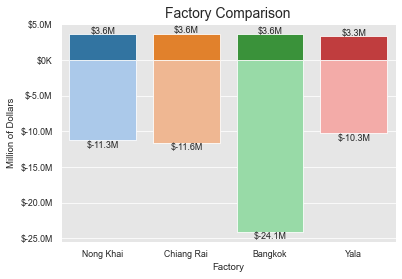

In [11]:
#importing the corresponding packages to plot
import matplotlib.pyplot as plt
#importing the package to improve the plot
import seaborn as sns

#definition of function to format the currency
def currency(x, pos):
    """The two args are the value and tick position"""
    #starting if statement to create the formating of the price
    if x >= 1e6 or x <= -1e6:
        #6 digits type of format
        s = '${:1.1f}M'.format(x*1e-6)
    #else statement  
    else:
        # 
        s = '${:1.0f}K'.format(x*1e-3)
    #returning the new type of value
    return s

#we define the list of the cost of each of 
cost = {'Nong Khai':-11252161, 'Chiang Rai':-11593001, 'Bangkok':-24062500, 
        'Yala':-10303601}

#we define the list of profit
prof = {'Nong Khai':round(nkm), 'Chiang Rai':round(crm), 'Bangkok':round(bkm), 
        'Yala':round(yalam)}

#improving the style of our graph
sns.set_style("darkgrid",{"axes.facecolor": ".9"})
#defining the background
sns.set_context("paper")

#To create all them at once
fig, ax = plt.subplots()

#we create the bar plot for cost
sns.barplot(x=list(cost.keys()), y=list(cost.values()), palette=sns.color_palette("pastel"), ax=ax)
#we create the bar plot for profit
sns.barplot(x=list(prof.keys()), y=list(prof.values()), ax=ax)

#we define the axis according to the currency we settled before
ax.yaxis.set_major_formatter(currency)

#we create a for loop to print the value labels of the cost
for key, value in enumerate(cost.items()):
    #we show the cost value in the format we want
    plt.text(key,value[1]-1000000,'${:1.1f}M'.format(value[1]*1e-6), fontsize=9,horizontalalignment='center')

#we create a for loop to print the value labels of the profit
for key, value in enumerate(prof.items()):
    #we show the cost value in the format we want
    plt.text(key,value[1]+100000,'${:1.1f}M'.format(value[1]*1e-6), fontsize=9,horizontalalignment='center')    
            
#we add the title of this graph
ax.set_title("Factory Comparison", fontsize=14)

#Add x-axis and y-axis labels
ax.set(xlabel="Factory", ylabel="Million of Dollars")

#We want to see the following plot
plt.show()
